In [123]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import FancyArrowPatch

from astropy.io import fits

import time
import glob
import os

from tilted import tilt_computer

In [124]:
params = {'axes.labelsize'  : 12,
          'xtick.labelsize' : 12,
          'ytick.labelsize' : 12,
          'font.size'       : 10,
          'font.family'     : 'DejaVu serif',
          'font.serif'      : 'Laro'
}

matplotlib.rcParams.update(params)

In [2]:
os.getcwd()

'C:\\Users\\priya\\Work\\Projects\\zzmisc\\AR tilt calculation\\jupyter notebooks'

In [3]:
main_dir = 'C:/Users/priya/Work/Projects/zzmisc/AR tilt calculation/'

In [4]:
magnetogram_13171_fits = glob.glob(os.path.join(main_dir, 'data/13171/*magnetogram*'))[0]
magnetogram_13773_fits = glob.glob(os.path.join(main_dir, 'data/13773/*magnetogram*'))[0]

In [5]:
magnetogram_13171 = fits.open(magnetogram_13171_fits)[1]
magnetogram_13171.data = np.flipud(magnetogram_13171.data)

magnetogram_13773 = fits.open(magnetogram_13773_fits)[1]
magnetogram_13773.data = np.flipud(magnetogram_13773.data)

In [6]:
# HARPNUM 13171
pipe_13171 =tilt_computer(magnetogram_13171, threshold = 400, SC = 25)

neg_13171, neg_disp_13171, pos_13171, pos_disp_13171 = pipe_13171.contouring_strongfieldregions()
x_fw_13171, y_fw_13171 = pipe_13171.fluxweighted_center()
df_13171 = pipe_13171.computeTilt()

# HARPNUM 13773
pipe_13773 = tilt_computer(magnetogram_13773, threshold = 400, SC = 25)

neg_13733, neg_disp_13773, pos_13773, pos_disp_13773 = pipe_13773.contouring_strongfieldregions()
x_fw_13773, y_fw_13773 = pipe_13773.fluxweighted_center()
df_13773 = pipe_13773.computeTilt()

14079

B_max: 2470.70
B_min: -1695.50

Hemishpere: N
HALEness: True
JOYness:  True


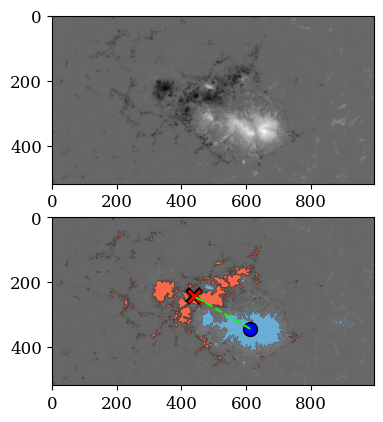

In [125]:
print(magnetogram_13171.header['NOAA_AR'])

print(f"\nB_max: {magnetogram_13171.data.max() :0.2f}")
print(f"B_min: {magnetogram_13171.data.min() :0.2f}")
print(f"\nHemishpere: {df_13171['Hemisphere'].iloc[0]}")
print(f"HALEness: {df_13171['HALEness'].iloc[0]}")
print(f"JOYness:  {df_13171['JOYness'].iloc[0]}")

#
plt.subplot(2, 1, 1)

plt.imshow(magnetogram_13171.data, cmap = 'gray')

#
plt.subplot(2, 1, 2)

plt.imshow(magnetogram_13171.data, cmap = 'gray')
plt.imshow(neg_disp_13171, cmap = 'Reds', vmin = 0.8, vmax = 1.2)
plt.imshow(pos_disp_13171, cmap = 'Blues', vmin = 0.8, vmax = 1.2)

plt.plot(x_fw_13171[0], y_fw_13171[0], 'o', color = 'k', ms = 10)
plt.plot(x_fw_13171[0], y_fw_13171[0], 'o', color = 'b', ms = 8)

plt.plot(x_fw_13171[1], y_fw_13171[1], marker = 'x', mec = 'k', mfc = 'r', ms = 10, mew = 4)
plt.plot(x_fw_13171[1], y_fw_13171[1], marker = 'x', mec = 'r', mfc = 'r', ms = 9, mew = 2)

plt.plot(x_fw_13171, y_fw_13171, ls = '--', color = 'lime')

plt.show()

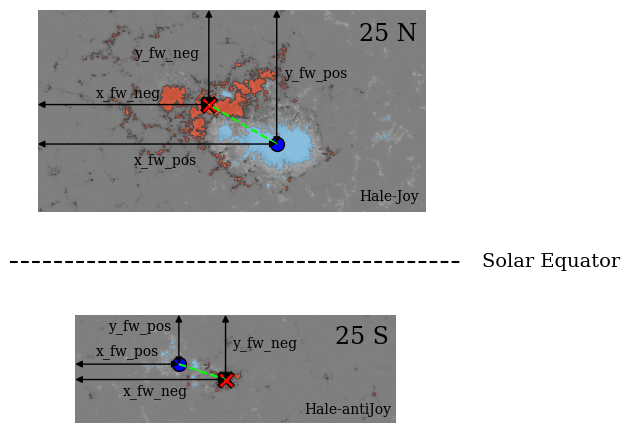

In [295]:
fig, axN = plt.subplots(1, 1, figsize = (5, 3))

## Northern hemisphere

#
axN.imshow(magnetogram_13171.data, cmap = 'gray', vmin = -1000, vmax = 1000)
axN.imshow(neg_disp_13171, cmap = 'Reds', vmin = 0.8, vmax = 1.2, alpha = 0.8)
axN.imshow(pos_disp_13171, cmap = 'Blues', vmin = 0.8, vmax = 1.2, alpha = 0.8)

axN.plot(x_fw_13171[0], y_fw_13171[0], marker = 'o', color = 'k', ms = 10)
axN.plot(x_fw_13171[0], y_fw_13171[0], marker = 'o', color = 'b', ms = 8)

axN.plot(x_fw_13171[1], y_fw_13171[1], marker = 'x', mec = 'k', mfc = 'r', ms = 10, mew = 4)
axN.plot(x_fw_13171[1], y_fw_13171[1], marker = 'x', mec = 'r', mfc = 'r', ms = 9, mew = 2)

axN.plot(x_fw_13171, y_fw_13171, color = 'lime', ls = '--')
axN.axis('off')

# fw positive polarity
# axN.axvline(x = x_fw_13171[0], ymin = 1 - y_fw_13171[0] / magnetogram_13171.data.shape[0], color = 'k', ls = ':')
# axN.axhline(y = y_fw_13171[0], xmax = x_fw_13171[0] / magnetogram_13171.data.shape[1], color = 'k', ls = ':')

posy_13171 = FancyArrowPatch(posA = (x_fw_13171[0], y_fw_13171[0]), posB = (x_fw_13171[0], 0), arrowstyle = '<|-|>',
                       color = '0.0', mutation_scale = 10, shrinkB = 0, shrinkA = 0, zorder = 2)
axN.add_artist(posy_13171)

posx_13171 = FancyArrowPatch(posA = (0, y_fw_13171[0]), posB = (x_fw_13171[0], y_fw_13171[0]), arrowstyle = '<|-|>',
                       color = '0.0', mutation_scale = 10, shrinkB = 0, shrinkA = 0, zorder = 2)
axN.add_artist(posx_13171)


axN.text(x_fw_13171[0] + 20, y_fw_13171[0] / 2, 'y_fw_pos')
axN.text(x_fw_13171[0] / 2 - 60, y_fw_13171[0] + 50, 'x_fw_pos')

# fw negative polarity
# axN.axvline(x = x_fw_13171[1], ymin = 1 - y_fw_13171[1] / magnetogram_13171.data.shape[0], color = 'k', ls = ':')
# axN.axhline(y = y_fw_13171[1], xmax = x_fw_13773[1] / magnetogram_13773.data.shape[1], color = 'k', ls = ':')

negy_13171 = FancyArrowPatch(posA = (x_fw_13171[1], y_fw_13171[1]), posB = (x_fw_13171[1], 0), arrowstyle = '<|-|>',
                       color = '0.0', mutation_scale = 10, shrinkA = 0, shrinkB = 0, zorder = 2)
axN.add_artist(negy_13171)

negx_13171 = FancyArrowPatch(posA = (0, y_fw_13171[1]), posB = (x_fw_13171[1], y_fw_13171[1]), arrowstyle = '<|-|>',
                       color = '0', mutation_scale = 10, shrinkA = 0, shrinkB = 0, zorder = 2)
axN.add_artist(negx_13171)

axN.text(x_fw_13171[1] - 190, y_fw_13171[1] / 2, 'y_fw_neg')
axN.text(x_fw_13171[1] / 2 - 70, y_fw_13171[1] - 20, 'x_fw_neg')

axN.text(magnetogram_13171.shape[1] - 170, 80, '25 N', fontsize = 17)
axN.text(magnetogram_13171.shape[1] - 170, magnetogram_13171.data.shape[0] - 30, 'Hale-Joy')


## Equator line

axEQ = fig.add_axes([0.07, -0.16, 0.9, 0.3])
axEQ.axhline(0.5, color = 'k', ls = '--')

axEQ.axis('off')

axEQ.text(1.05, 0.45, 'Solar Equator', fontsize = 14)

## Southern hemisphere

#
axS = fig.add_axes([0.2, -0.75, 0.64, 0.77])
axS.imshow(magnetogram_13773.data, cmap = 'gray', vmin = -1000, vmax = 1000)
axS.imshow(neg_disp_13773, cmap = 'Reds', vmin = 0.8, vmax = 1.2, alpha = 0.8)
axS.imshow(pos_disp_13773, cmap = 'Blues', vmin = 0.8, vmax = 1.2, alpha = 0.8)

axS.plot(x_fw_13773[0], y_fw_13773[0], marker = 'o', color = 'k', ms = 10)
axS.plot(x_fw_13773[0], y_fw_13773[0], marker = 'o', color = 'b', ms = 8)

axS.plot(x_fw_13773[1], y_fw_13773[1], marker = 'x', mec = 'k', mfc = 'k', ms = 10, mew = 4)
axS.plot(x_fw_13773[1], y_fw_13773[1], marker = 'x', mec = 'r', mfc = 'r', ms = 9, mew = 2)

axS.plot(x_fw_13773, y_fw_13773, color = 'lime', ls = '--')

# fw positive polarity
posy_13773 = FancyArrowPatch(posA = (x_fw_13773[0], y_fw_13773[0]), posB = (x_fw_13773[0], 0), arrowstyle = '<|-|>',
                                     color = '0.0', mutation_scale = 10, shrinkB = 0, shrinkA = 0, zorder = 2)
axS.add_artist(posy_13773)

posx_13773 = FancyArrowPatch(posA = (0, y_fw_13773[0]), posB = (x_fw_13773[0], y_fw_13773[0]), arrowstyle = '<|-|>',
                             color = '0.0', mutation_scale = 10, shrinkB = 0, shrinkA = 0, zorder = 2)
axS.add_artist(posx_13773)

axS.text(x_fw_13773[0] - 180, y_fw_13773[0] / 2 - 25, 'y_fw_pos')
axS.text(x_fw_13773[0] / 2 - 80, y_fw_13773[0] - 25, 'x_fw_pos')

# fw negative polarity

negy_13773 = FancyArrowPatch(posA = (x_fw_13773[1], y_fw_13773[1]), posB = (x_fw_13773[1], 0), arrowstyle = '<|-|>',
                             color = '0.0', mutation_scale = 10, shrinkA = 0, shrinkB = 0, zorder = 2)
axS.add_artist(negy_13773)

negx_13773 = FancyArrowPatch(posA = (0, y_fw_13773[1]), posB = (x_fw_13773[1], y_fw_13773[1]), arrowstyle = '<|-|>',
                             color = '0', mutation_scale = 10, shrinkA = 0, shrinkB = 0, zorder = 2)
axS.add_artist(negx_13773)

axS.text(x_fw_13773[1]  + 20, y_fw_13773[1] / 2, 'y_fw_neg')
axS.text(x_fw_13773[1] / 2 - 70, y_fw_13773[1] + 40, 'x_fw_neg')

axS.text(magnetogram_13773.shape[1] - 155, 75, '25 S', fontsize = 17)
axS.text(magnetogram_13773.shape[1] - 235, magnetogram_13773.data.shape[0] - 25, 'Hale-antiJoy')

axS.axis('off')

plt.savefig(main_dir + 'figures/graphic1.png', bbox_inches = 'tight', dpi = 700)

plt.show()

In [62]:
magnetogram_13171.data.max(), magnetogram_13171.data.min()

(2470.7000000000003, -1695.5)

In [63]:
magnetogram_13773.data.max(), magnetogram_13773.data.min()

(1077.8, -1257.5)